In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [26]:
# EDA -> Utils
# Pipeline -> Settings
# Model -> Tuning
# Presentation / Read Me

In [27]:
# load images with labels
# train & validate splits

# load test data from other files

## View Data

In [46]:
df = pd.read_csv('../data/train.csv')
df[df['target'] == 1].tail(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
32557,ISIC_9828846,IP_8210115,male,55.0,head/neck,melanoma,malignant,1
32674,ISIC_9863642,IP_2172761,female,35.0,head/neck,melanoma,malignant,1
32701,ISIC_9870885,IP_3298186,female,80.0,lower extremity,melanoma,malignant,1
32806,ISIC_9900191,IP_6459335,male,60.0,torso,melanoma,malignant,1
32837,ISIC_9910791,IP_6776978,female,60.0,head/neck,melanoma,malignant,1
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1
33117,ISIC_9998682,IP_2516168,male,60.0,head/neck,melanoma,malignant,1


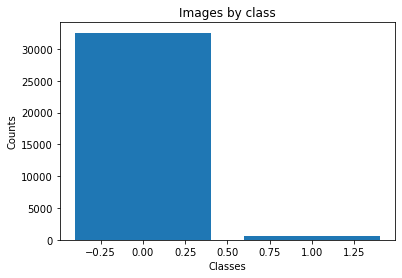

In [47]:
d = df.groupby('target').size().to_frame('size').reset_index() #,   df.groupby('dx').size()/df.shape[0]
fig, ax = plt.subplots()
ax.bar(d['target'],d['size']);
ax.set_title('Images by class')
ax.set_xlabel('Classes')
ax.set_ylabel('Counts');

In [20]:
df[df['target'] == 0].tail(10)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
33115,ISIC_9998240,IP_1139701,female,45.0,torso,unknown,benign,0
33116,ISIC_9998582,IP_0414408,male,50.0,lower extremity,unknown,benign,0
33118,ISIC_9998937,IP_3091321,male,40.0,head/neck,nevus,benign,0
33119,ISIC_9998965,IP_3293337,male,50.0,torso,unknown,benign,0
33120,ISIC_9999127,IP_9583707,male,20.0,torso,unknown,benign,0
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0
33125,ISIC_9999806,IP_0046310,male,45.0,torso,nevus,benign,0


In [32]:
images_dir = 'data/HAM10000_images/'
df = pd.read_csv('../data/HAM10000_metadata')
df.head(5)

# df[df['dx'] == 'nv'].count()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


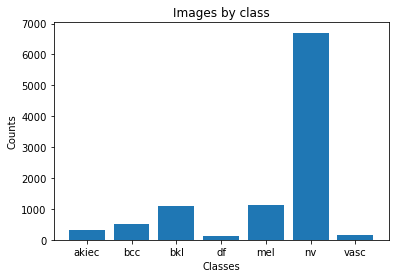

In [44]:
#identify class imbalance
d = df.groupby('dx').size().to_frame('size').reset_index() #,   df.groupby('dx').size()/df.shape[0]
fig, ax = plt.subplots()
ax.bar(d['dx'],d['size']);
ax.set_title('Images by class')
ax.set_xlabel('Classes')
ax.set_ylabel('Counts');


In [33]:
classes = df['dx'].unique().tolist()
classes

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [6]:
df = df.drop_duplicates(subset=['lesion_id'])

In [34]:
paths = df['image_id'].apply(lambda x: x + '.jpg')
paths = paths.tolist()
labels = df['dx'].apply(lambda x: classes.index(x))
labels

0        0
2        0
4        0
6        0
8        0
        ..
9994     6
10001    6
10004    6
10008    6
10010    6
Name: dx, Length: 7470, dtype: int64

In [40]:
test = list(zip(paths,labels))
test[5]

('ISIC_0025276.jpg', 0)

In [9]:
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,vidir_modern
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,vidir_modern
11,HAM_0004234,ISIC_0029396,bkl,histo,85.0,female,chest,vidir_modern
13,HAM_0001949,ISIC_0025767,bkl,histo,70.0,male,trunk,vidir_modern
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,vidir_modern
16,HAM_0001601,ISIC_0025915,bkl,histo,75.0,male,upper extremity,vidir_modern


In [41]:
img = mpimg.imread(images_dir+paths[7])
# imgplot = plt.imshow(img)
# plt.show()

## Experiment with data pipeline

In [42]:
img.shape

(450, 600, 3)

In [36]:
ds_train = tf.data.Dataset.from_tensor_slices((paths,labels))
def read_image(file,label):
    img = tf.io.read_file(images_dir+file)
    img = tf.image.decode_image(img,channels=3,dtype=tf.float32)
    return img,label
def augment(image,label):
    #stuff?
    #image = tf.image.reshape(image,)
    return image,label

ds_train = ds_train.map(read_image).map(augment).batch(2)

In [37]:
ds = tf.data.Dataset.from_tensor_slices((paths,labels))
ds = ds.map(read_image).map(augment).batch(2)

In [26]:
ds.take(1)

<TakeDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.string)>

## Create and Test a model

In [43]:
cnn = keras.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(450,600,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(7,activation='softmax')   
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])


In [44]:
cnn.fit(ds,epochs=1)

3735/3735 [==============================] - 6135s 2s/step - loss: 8.6984 - accuracy: 0.9711


In [45]:
cnn.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model/assets
